## Importing Required Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

## Data Preprocessing

In [ ]:
df = pd.read_excel('C:\\Users\\harsh\\Desktop\\farming\\crop_train.xls')
df = df.drop(['State'], axis=1)
# df = df.drop(['District'], axis=1)
df = df.drop(['Year'], axis=1)
df

In [ ]:
crop_name = df['Crop'].unique()

In [ ]:
main_crop = []
for crop in crop_name:
    #print([df.Crop == crop])xawb NRgd1`qaz
    if len(df[df['Crop'] == crop]) > 5000:
        main_crop.append(crop)
        print(crop, len(df[df['Crop'] == crop]))

In [ ]:
# df.shape

In [ ]:
crop_data = pd.DataFrame()
for crop in main_crop:
    index = df[df.Crop == crop].index
    for i in index:
        crop_data = crop_data.append(df.xs(i))
    print(crop)

In [ ]:
crop_data = crop_data.reset_index()
crop_data['Crop'].unique()

In [ ]:
from sklearn.utils import shuffle

In [ ]:
import os
a=os.getcwd()
a

'/Users/harshvardhanpratap/Desktop/Minor/Work'

In [ ]:
# df_train.to_csv("CropDataTrain_final.csv")

In [ ]:
# loading datasets
df_train = pd.read_csv("/Users/harshvardhanpratap/Desktop/Minor/Work/CropTrainFinal.csv")
df_test = pd.read_csv("/Users/harshvardhanpratap/Desktop/Minor/Work/CropTestFinal.csv")
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_t = df_train[:10000]


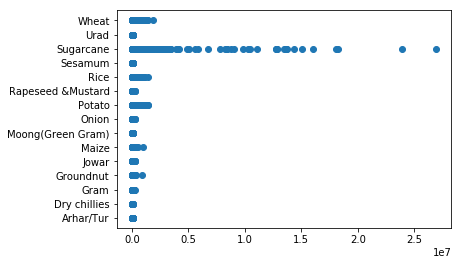

In [ ]:
x1 = df_t['Production']
y1 = df_t['Crop']
plt.scatter(x1, y1)
plt.show()

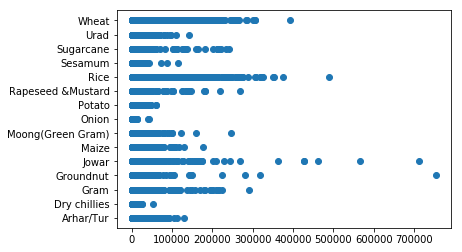

In [ ]:
import matplotlib.pyplot as plt
x1 = df_t['Area']
y1 = df_t['Crop']
plt.scatter(x1, y1)
plt.show()

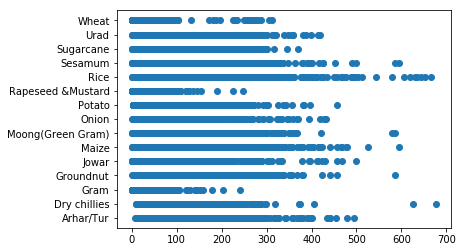

In [ ]:
import matplotlib.pyplot as plt
x1 = df_t['Rainfall']
y1 = df_t['Crop']
plt.scatter(x1, y1)
plt.show()

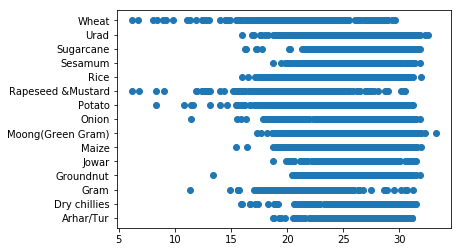

In [ ]:
import matplotlib.pyplot as plt
x1 = df_t['Temperature']
y1 = df_t['Crop']
plt.scatter(x1, y1)
plt.show()

In [ ]:
y_ = pd.DataFrame()
y_['Crop'] = df_train['Crop']
df_train = df_train.drop(['Crop'], axis=1)

In [ ]:
cr = LabelEncoder()
se = LabelEncoder()
df_train['Season'] = se.fit_transform(df_train['Season'])
y_['Crop'] = cr.fit_transform(y_['Crop'])

In [ ]:
x_train = np.array(df_train)
y_train = np.array(y_)

In [ ]:
y_ts = pd.DataFrame()
y_ts['Crop'] = df_test['Crop']
df_test = df_test.drop(['Crop'], axis=1)

In [ ]:
df_test['Season'] = se.transform(df_test['Season'])
y_ts['Crop'] = cr.transform(y_ts['Crop'])

In [ ]:
x_test = np.array(df_test)
y_test = np.array(y_ts)

In [ ]:
df_train.tail(15)

,Area,Production,Rainfall,Season,Temperature
85210,77734.0,112092.0,2.434750,2,20.326500
85211,2004.0,1900.0,72.284000,2,23.890750
85212,6059.0,12652.0,394.930000,3,25.192500
85213,592.0,1455.0,151.060667,1,28.058333
85214,37051.0,48897.0,247.116333,1,25.588333
85215,54.0,7.0,287.165667,1,24.892333
85216,180.0,45.0,46.165500,2,24.072500
85217,16.0,97.4,7.253000,5,22.563250
85218,959.0,13821.0,101.158667,1,28.537333
85219,300.0,200.0,1.174000,2,23.646500


In [ ]:
df_test.head(15)

,Area,Production,Rainfall,Season,Temperature
0,28625.0,1784483.0,143.636000,1,28.299667
1,138347.0,258707.0,8.579000,2,20.535500
2,610.0,3547.0,56.610000,2,23.534750
3,200.0,300.0,223.255500,3,30.272250
4,33000.0,23100.0,127.565667,1,26.343000
5,7700.0,3500.0,71.837000,1,29.354333
6,7425.0,3438.0,159.932333,1,28.107333
7,4842.0,4019.0,132.896000,1,28.846667
8,842.0,1880.0,127.488000,3,26.284500
9,4500.0,700.0,139.045333,1,26.061000


In [ ]:
y_['Crop'].unique()

array([ 6,  5, 14,  3, 12,  4,  8,  9,  7, 10,  1,  2,  0, 13, 11])

In [ ]:
df_train = df_train.drop(['District'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
season = LabelEncoder()
crop = LabelEncoder()
x['Season'] = season.fit_transform(x['Season'])
y['Crop'] = crop.fit_transform(y['Crop'])

In [ ]:
y = pd.DataFrame()
y['Crop'] = df_train['Crop']
df_ = df_train
df_train = df_train.drop(['Crop'], axis=1)
x = df_train

In [ ]:
# filling nan values in production
prod = x['Production']
prod = pd.DataFrame(prod)
prod = prod.fillna(prod.mean())
prod.isnull().values.any()

In [ ]:
# filling back values to dataframe
x['Production'] = prod
np.isnan(x['Production']).sum()

In [ ]:
df_ = x

In [ ]:
df_['crop'] = y['Crop']

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((85225, 5), (85225, 1), (21307, 5), (21307, 1))

In [ ]:
x_train_k.shape, y_train_k.shape, x_test_k.shape, y_test_k.shape

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_traink = scaler.fit_transform(x_train_k)
x_testk =  scaler.transform(x_test_k)

## Ploting Confusion Matrix

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
y_pred1 = clf1.predict(x_test)

In [ ]:
clf1.score(x_test, y_test)

0.6792134040456188

In [ ]:
y_pred1[:15]

array([12, 14,  5,  5,  6, 11, 13,  0,  5, 11,  7, 10,  1,  9,  7])

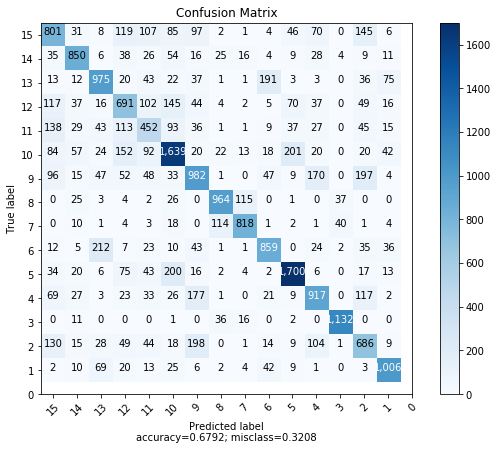

In [ ]:
mat1 = confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm           = mat1, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred2 = sgd.predict(x_test)
sgd.score(x_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.07579668653494157

In [ ]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(x_train, y_train)
# clf.score(x_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors = 24)
clf2.fit(x_train, y_train)
y_pred3 = clf2.predict(x_test)
clf2.score(x_test, y_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.43253390904397615

In [ ]:
y_test.shape

(21307, 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

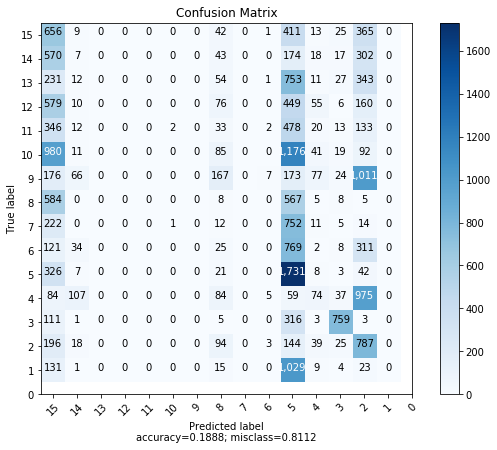

In [ ]:
mat3 = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm           = mat3, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

clf6 = XGBClassifier(max_depth=7, eta = 0.2, gamma = 3, nrounds = 40)

clf6.fit(x_train, y_train)
y_pred4 = clf6.predict(x_test)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 57.34%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


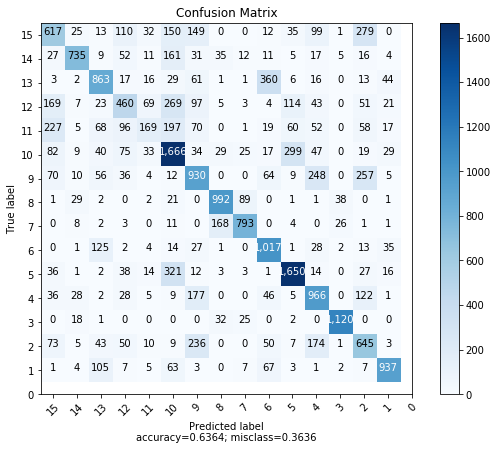

In [ ]:
mat4 = confusion_matrix(y_test, y_pred4)
plot_confusion_matrix(cm           = mat4, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred5 = clf.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf.score(x_test, y_test)

0.2579903318158352

In [ ]:
accuracy_score(y_test, y_pred5)

0.2579903318158352

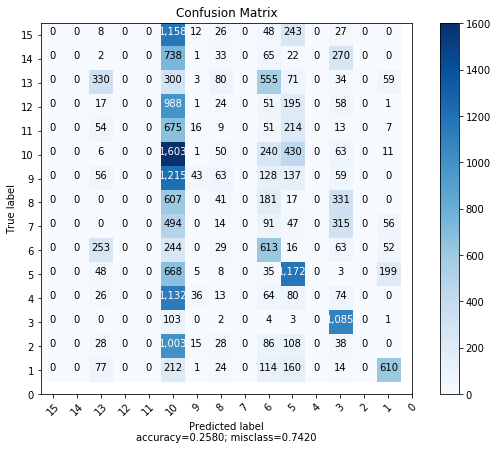

In [ ]:
mat5 = confusion_matrix(y_test, y_pred5)
plot_confusion_matrix(cm           = mat5, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

## Visualization

In [ ]:
accuracy_score_y = [accuracy_score(y_test, y_pred1)*100, accuracy_score(y_test, y_pred2)*100, accuracy_score(y_test, y_pred3)*100, accuracy_score(y_test, y_pred4)*100, accuracy_score(y_test, y_pred5)*100]
f1_score_y = [f1_score(y_test, y_pred1)*100, f1_score(y_test, y_pred2)*100, f1_score(y_test, y_pred3)*100, f1_score(y_test, y_pred4)*100, f1_score(y_test, y_pred5)*100]
recall_score_y = [recall_score(y_test, y_pred1)*100, recall_score(y_test, y_pred2)*100, recall_score(y_test, y_pred3)*100, recall_score(y_test, y_pred4)*100, recall_score(y_test, y_pred5)*100]

In [ ]:
x_labels = [ 'RF', 'SGD', 'KNN', 'XGB','LR']
#LR-Logistic Regression RF-Random Forest GB-Gradient Boosting SVM-Support Vector Machines NB-Naive Bayes

<function matplotlib.pyplot.show>

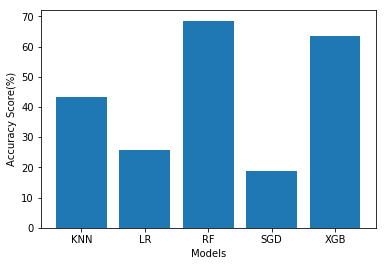

In [ ]:
plt.ylabel('Accuracy Score(%)')
plt.xlabel('Models')
plt.bar(x_labels,accuracy_score_y)
plt.show

In [ ]:
# plt.ylabel('F1 Score(%)')
# plt.xlabel('Models')
# plt.bar(x_labels,f1_score_y)
# plt.show

In [ ]:
# plt.ylabel('Recall Score(%)')
# plt.xlabel('Models')
# plt.bar(x_labels,recall_score_y)
# plt.show

In [ ]:
x_train.shape, y_train.shape

((85225, 5), (85225, 1))

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
one = OneHotEncoder()

In [ ]:
ytrainkeras = one.fit_transform(y_train)

In [ ]:
ytrainkeras

<85225x15 sparse matrix of type '<class 'numpy.float64'>'
	with 85225 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

array([[12],
       [14],
       [ 7],
       ...,
       [ 2],
       [ 9],
       [10]])

In [ ]:
ytestkeras = one.transform(y_test)

In [ ]:
ytrainkeras.shape, ytestkeras.shape

((85225, 15), (21307, 15))

In [ ]:
model = Sequential()
model.add(Dense(2048, input_dim = x_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, input_dim = 6, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(15, activation='relu'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, ytrainkeras, epochs=10, batch_size=10000)

Epoch 1/10
85225/85225 [==============================] - 42s 489us/step - loss: 2.4660 - acc: 0.1915
Epoch 2/10
85225/85225 [==============================] - 42s 497us/step - loss: 2.3009 - acc: 0.2174
Epoch 3/10
85225/85225 [==============================] - 55s 644us/step - loss: 2.2758 - acc: 0.2247
Epoch 4/10
85225/85225 [==============================] - 57s 664us/step - loss: 2.2558 - acc: 0.2299
Epoch 5/10
85225/85225 [==============================] - 51s 603us/step - loss: 2.2557 - acc: 0.2243
Epoch 6/10
85225/85225 [==============================] - 57s 666us/step - loss: 2.2310 - acc: 0.2381
Epoch 7/10
85225/85225 [==============================] - 60s 705us/step - loss: 2.2154 - acc: 0.2355
Epoch 8/10
85225/85225 [==============================] - 57s 675us/step - loss: 2.2170 - acc: 0.2426
Epoch 9/10
85225/85225 [==============================] - 46s 538us/step - loss: 2.2192 - acc: 0.2439
Epoch 10/10
85225/85225 [==============================] - 44s 513us/step - loss: 